In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [2]:


# Implementação das métricas de classificação

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.average(np.diag(cm) / np.sum(cm, axis=0), weights=np.sum(cm, axis=0))

def recall(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return np.average(np.diag(cm) / np.sum(cm, axis=1), weights=np.sum(cm, axis=1))

def f1_measure(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * (prec * rec) / (prec + rec)

In [4]:


# Divisão estratificada dos dados do conjunto de dados Iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.9, stratify=iris.target, random_state=42)

# Standardização dos dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Treinamento do modelo de regressão logística

model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.9481
Precision: 0.9481
Recall: 0.9481
F1 Measure: 0.9481


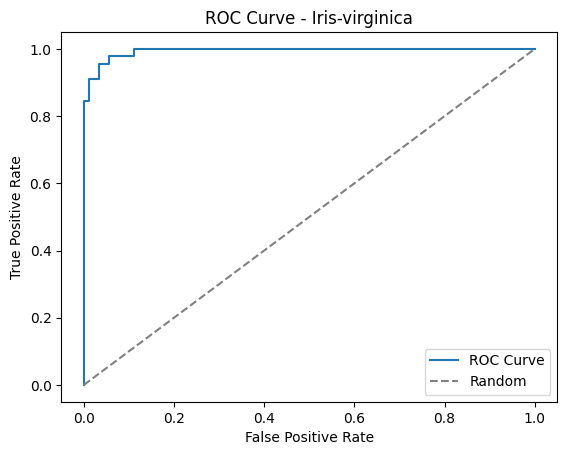

AUC: 0.9941


In [5]:
# Avaliação do modelo usando as métricas implementadas

y_pred = model.predict(X_test)

acc = accuracy(y_test, y_pred)
prec = precision(y_test, y_pred)
rec = recall(y_test, y_pred)
f1 = f1_measure(y_test, y_pred)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1 Measure: {f1:.4f}')

# Cálculo da curva ROC e da métrica AUC para a classe Iris-virginica

virginica_indices = np.where(iris.target_names == 'virginica')[0]
y_test_binary = np.where(y_test == virginica_indices, 1, 0)
y_score = model.predict_proba(X_test)[:, virginica_indices]

fpr, tpr, _ = roc_curve(y_test_binary, y_score)
auc = roc_auc_score(y_test_binary, y_score)

# Plot da curva ROC

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Iris-virginica')
plt.legend()
plt.show()

print(f'AUC: {auc:.4f}')
